## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('./drive//MyDrive/lab-1/train.csv')
gold_df = pd.read_csv('./drive//MyDrive/lab-1/gold.csv')
lh_df = pd.read_csv('./drive//MyDrive/lab-1/lh.csv')

In [4]:
train_df.head()

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1


In [5]:
gold_df.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302


In [6]:
lh_df.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

***Решение:***

Решать задачу предобработки данных, чтобы в нём не осталось пропусков, можно различными спопособами.  
1. Самым простым и очевидным кажется способ "а давайте просто удалим строки, в которых есть пропуски". Чем же это плохо? Если матрица сильно разреженная, можем случайно остаться вообще без таблицы с данными :( 
2. Можно поискать скрытые зависимости между столбцами, как, например, было сделано в лаборатоной работе 0, и заполнить таким образом данные.
3. Стандартным подходом является заполнение пропущенных данных значением средним, медианным или модальным (рассматриваем только числовые значения).
4. Если мы хотим заполнить категориальный признак, можем воспользоваться наиболее частотной записью.

Чтобы узнать, какой способ заполнения данных подходит лучше всего, нужно смотреть на метрику, которую мы пытаемся оптимизировать.


Нас просили (пока студенты не сказали, что нет пропусков :D) заполнить данные для таблиц *gold.csv* и *lh.csv*. Видим, что для каждого матча фиксируются данные в одно и то же время. Для каждого игрока количество золота и убитых монстров не убывает с течением времени, поэтому попробуем восстанавливать данные в зависимости от времени. Например, можно найти статистику (среднее, медиану, моду) на каждой строке и заполнить таким образом данные.

In [7]:
#Когда заменяем любой пропуск каким-нибудь числом val (это может быть любая статистика, посчитанная по данным)
val = 0
df = pd.DataFrame(data=[[1, -1, -1], [2, -1, 7], [4, 6, 7]], columns=['A', 'B', 'C'])
df[df == -1] = np.nan
df.fillna(val)

,A,B,C
0,1,0.0,0.0
1,2,0.0,7.0
2,4,6.0,7.0


In [8]:
# Если хотим заменить пропуск в строке на среднее (это может быть любая статистика, посчитанная по строке) в строке
df = pd.DataFrame(data=[[1, -1, -1], [2, -1, 7], [4, 6, 7]], columns=['A', 'B', 'C'])
df[df == -1] = np.nan
df = df.transpose()
df = df.fillna(value={col: df[col].mean() for col in df.columns})
df = df.transpose()
df

,A,B,C
0,1.0,1.0,1.0
1,2.0,4.5,7.0
2,4.0,6.0,7.0


In [9]:
# Удалим все строки с пропусками
df = pd.DataFrame(data=[[1, -1, -1], [2, -1, 7], [4, 6, 7]], columns=['A', 'B', 'C'])
df[df == -1] = np.nan
df.dropna()

,A,B,C
2,4,6.0,7.0


В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [ ]:
for column in gold_df.columns:
  if column.startswith("player"):
    gold_df.rename(columns={column: column + "_gold"}, inplace=True)

for column in lh_df.columns:
  if column.startswith("player"):
    lh_df.rename(columns={column: column + "_lh"}, inplace=True)

train_df_on_600_sec = train_df.join(gold_df[gold_df.times == 600].set_index('mid'), on='mid', how='inner')
train_df_on_600_sec = train_df_on_600_sec.join(lh_df[lh_df.times == 600].drop(columns=['times']).set_index('mid'), on='mid', how='inner')

train_df_on_600_sec.head()

,mid,radiant_won,times,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
0,0,1,600,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,4,43,3,57,41,34,35,75,2,46
1,1,0,600,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,5,63,14,28,47,49,23,3,30,39
2,2,1,600,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,34,6,69,42,23,6,12,56,13,12
3,4,1,600,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,30,41,45,23,4,26,9,23,37,6
4,5,1,600,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,42,5,16,30,3,42,24,53,12,14


In [ ]:
train_df_on_600_sec.shape

(24974, 23)

**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

В качестве агрегирующих функций можно использовать следующие: 
* максимум
* минимум
* сумма

Почему именно такие? Логично предположить, что в игре шансов победить больше у той команды, которая заработала больше золота и убила больше монстров, поэтому давайте посмотрим, какое минимальное/максимальное золота/монстров, а также сколько всего убитых монстров и золота в командах. (Извините, если я где-то налажала, я не знаток в играх :D)

In [ ]:
radiant_gold = ['player_0_gold', 'player_1_gold', 'player_2_gold', 'player_3_gold', 'player_4_gold']
radiant_lh = ['player_0_lh', 'player_1_lh', 'player_2_lh', 'player_3_lh', 'player_4_lh']

dire_gold = ['player_5_gold', 'player_6_gold', 'player_7_gold', 'player_8_gold', 'player_9_gold']
dire_lh = ['player_5_lh', 'player_6_lh', 'player_7_lh', 'player_8_lh', 'player_9_lh']

X = pd.DataFrame()
X['radiant_gold_max'] = train_df_on_600_sec[radiant_gold].max(axis=1)
X['radiant_gold_min'] = train_df_on_600_sec[radiant_gold].min(axis=1)
X['radiant_gold_sum'] = train_df_on_600_sec[radiant_gold].sum(axis=1)

X['dire_gold_max'] = train_df_on_600_sec[dire_gold].max(axis=1)
X['dire_gold_min'] = train_df_on_600_sec[dire_gold].min(axis=1)
X['dire_gold_sum'] = train_df_on_600_sec[dire_gold].sum(axis=1)

X['radiant_lh_max'] = train_df_on_600_sec[radiant_lh].max(axis=1)
X['radiant_lh_min'] = train_df_on_600_sec[radiant_lh].min(axis=1)
X['radiant_lh_sum'] = train_df_on_600_sec[radiant_lh].sum(axis=1)

X['dire_lh_max'] = train_df_on_600_sec[dire_lh].max(axis=1)
X['dire_lh_min'] = train_df_on_600_sec[dire_lh].min(axis=1)
X['dire_lh_sum'] = train_df_on_600_sec[dire_lh].sum(axis=1)

X = X.values
y = train_df_on_600_sec.radiant_won.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=753, shuffle=True)

Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [ ]:
def print_grid_search_cv(model, figsize=(9, 9)):
  splits = [key for key in model.cv_results_.keys() if key.startswith('split')]

  count = len(model.cv_results_['params'])
  cv_results = []
  for i in range(count):
    cv_result = [model.cv_results_[split][i] for split in splits]
    cv_results.append(cv_result)

  plt.figure(figsize=figsize)
  plt.title('95% доверительные интервалы качества на кросс-валидации')
  plt.ylabel('roc-auc')
  plt.boxplot(x=cv_results,
              labels=model.cv_results_['params'],
              meanline=True,
              showmeans=True,
              meanprops={'c': 'b', 'label': 'mean'})
  plt.legend()
  plt.grid()
  plt.show()

**Logistic Regression Classifier**

In [ ]:
reg_coef = [0.1, 1., 10.]
param_grid = {'C': reg_coef}

clf = GridSearchCV(LogisticRegression(solver='saga', max_iter=1e4),
                   param_grid,
                   cv=KFold(n_splits=5, shuffle=True, random_state=753),
                   scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000.0, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

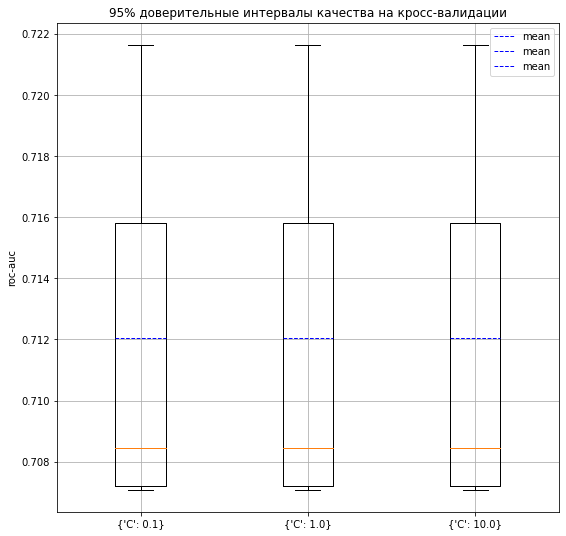

In [77]:
print_grid_search_cv(clf)

In [80]:
def get_best_results(model):
  splits = [key for key in model.cv_results_.keys() if key.startswith('split')]
  cv_results = [model.cv_results_[split][model.best_index_] for split in splits]
  return model.best_params_, cv_results, model.best_score_

In [84]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(clf)))

Лучшие параметры: {'C': 0.1}
 cv-scores: [0.721638795483816, 0.708443200653475, 0.7071955831338743, 0.7070899933630587, 0.7158088532510645]
 mean: 0.7120352851770577


**Вывод:** К сожалению, изменение параметра регуляризации для логистической регрессии не сильно повлияло на качество :( доверительные интервалы почти одинаковые.

**C-Support Vector Classification**

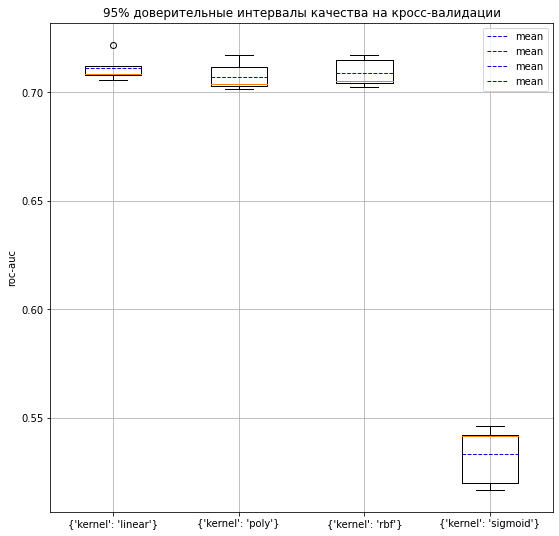

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'kernel': kernel}

svc = GridSearchCV(SVC(),
                   param_grid,
                   cv=KFold(n_splits=5, shuffle=True, random_state=753),
                   scoring='roc_auc')
svc.fit(X_train, y_train)

print_grid_search_cv(svc)

In [85]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(svc)))

Лучшие параметры: {'kernel': 'linear'}
 cv-scores: [0.7218625500503637, 0.7083410325075222, 0.7054913931997819, 0.7079903808230258, 0.7122911830529188]
 mean: 0.7111953079267226


**Вывод:** Наибольшее среднее качество у метода опорных векторов с линейным ядром, кроме того у него самый узкий доверительный интервал. Чем уже доверительный интервал, тем больше вероятность того, что процент исследуемой совокупности представляет реальное число исходной совокупности, что дает большую уверенность в отношении результата исследуемого объекта.

**Multi-layer Perceptron Classifier**

In [ ]:
hidden_layer_sizes = [(100, ), (100, 64,)]
param_grid = {'hidden_layer_sizes': hidden_layer_sizes}

mlpc_clf = GridSearchCV(MLPClassifier(random_state=753, max_iter=1000),
                        param_grid,
                        cv=KFold(n_splits=5, shuffle=True, random_state=753),
                        scoring='roc_auc')
mlpc_clf.fit(X_train, y_train)

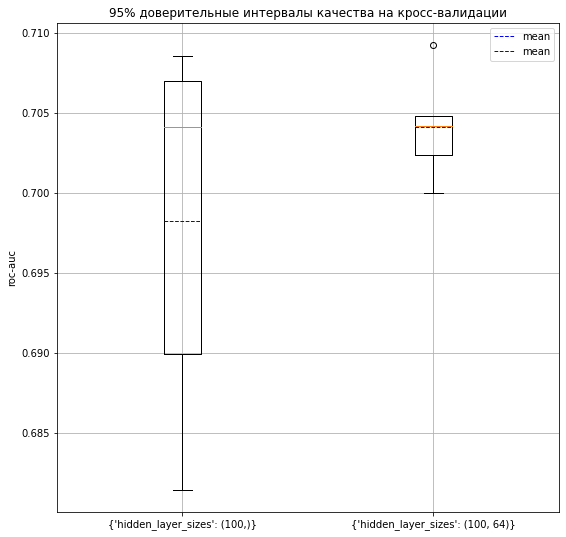

In [ ]:
print_grid_search_cv(mlpc_clf)

In [86]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(mlpc_clf)))

Лучшие параметры: {'hidden_layer_sizes': (100, 64)}
 cv-scores: [0.709243343740134, 0.7023620021747399, 0.7041465688816779, 0.7000069954915435, 0.7047873555686444]
 mean: 0.704109253171348


**Вывод:** Наибольшее среднее у перцептрона с двумя скрытыми слоями, также у него более узкий доверительный интервал.

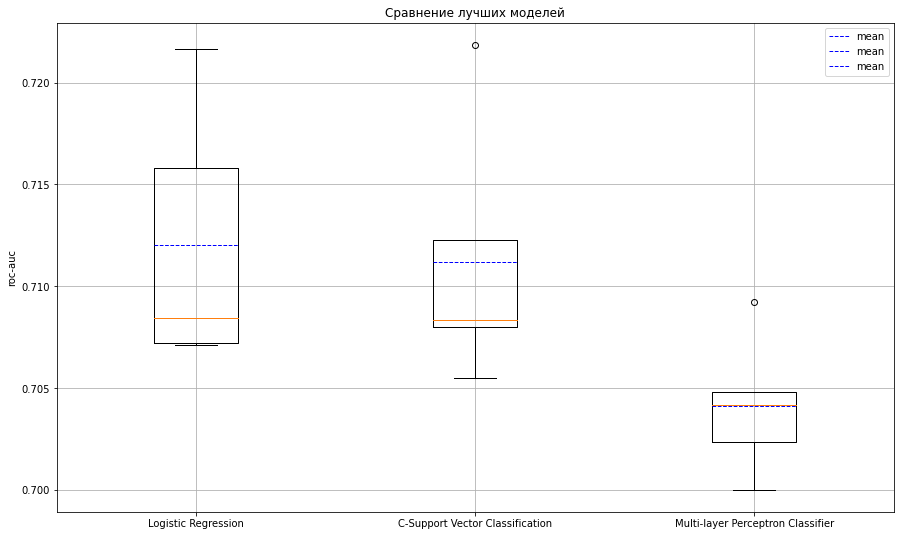

In [258]:
plt.figure(figsize=(15, 9))

plt.title('Сравнение лучших моделей')
plt.boxplot(x=[get_best_results(clf)[1], get_best_results(svc)[1], get_best_results(mlpc_clf)[1]],
            labels=['Logistic Regression', 'C-Support Vector Classification', 'Multi-layer Perceptron Classifier'],
            meanline=True,
            showmeans=True,
            meanprops={'c': 'b', 'label': 'mean'})
plt.ylabel('roc-auc')
plt.grid()
plt.legend()
plt.show()

**Вывод:** На графике показано качество лучших моделей для каждого типа классификатора. Видим, что у логистической регрессии наибольшее среднее качество, но также и наибольший доврительный интервал, а у перцептона качество наихудшее с меньшим доверительным интервалом. Я бы присмотрелась к методу опорных векторов, потому что у него почти такое же среднее качество, как у логистической регресии, но с меньшим доверительным интервалом. Возможно, следует развивать именно данную модель и улучшать её.

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

In [ ]:
print("Таблица gold")
print("Минимум в столбце\n", gold_df.min(axis=0))
print("___________________")
print("Максимум в столбце\n", gold_df.max(axis=0))

Таблица gold
Минимум в столбце
 mid                0
times             60
player_0_gold    168
player_1_gold    240
player_2_gold    169
player_3_gold    222
player_4_gold    240
player_5_gold    149
player_6_gold    187
player_7_gold    143
player_8_gold    166
player_9_gold    159
dtype: int64
___________________
Максимум в столбце
 mid              49947
times              600
player_0_gold    15046
player_1_gold    16572
player_2_gold    12546
player_3_gold    13857
player_4_gold    13802
player_5_gold    18518
player_6_gold    13085
player_7_gold    14848
player_8_gold    12453
player_9_gold    17083
dtype: int64


In [ ]:
print("Таблица lh")
print("Минимум в столбце\n", lh_df.min(axis=0))
print("___________________")
print("Максимум в столбце\n", lh_df.max(axis=0))

Таблица lh
Минимум в столбце
 mid             0
times          60
player_0_lh     1
player_1_lh     1
player_2_lh     1
player_3_lh     1
player_4_lh     1
player_5_lh     1
player_6_lh     1
player_7_lh     1
player_8_lh     1
player_9_lh     1
dtype: int64
___________________
Максимум в столбце
 mid            49947
times            600
player_0_lh      113
player_1_lh      129
player_2_lh      131
player_3_lh      116
player_4_lh      119
player_5_lh      112
player_6_lh      127
player_7_lh      114
player_8_lh      108
player_9_lh      108
dtype: int64


Значения признаков для игроков команд в таблице gold значительно больше, чем в таблице lh. Данный факт скорее всего слабо повлияет на все исследуемые в данной лабораторной работе методы, так как они являются линейными. Однако я бы не стала делать поспешных выводов про перцептрон, тк обычно после нормализации качество нейронных сетей улучшается.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**Logistic Regression Classifier**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logreg', LogisticRegression(solver='saga', max_iter=1e4))])

reg_coef = [0.1, 1., 10.]
param_grid = {'logreg__C': reg_coef}

log_reg_scaled_clf = GridSearchCV(pipe,
                                  param_grid,
                                  cv=KFold(n_splits=5, shuffle=True, random_state=753),
                                  scoring='roc_auc')
log_reg_scaled_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000.0,
                        

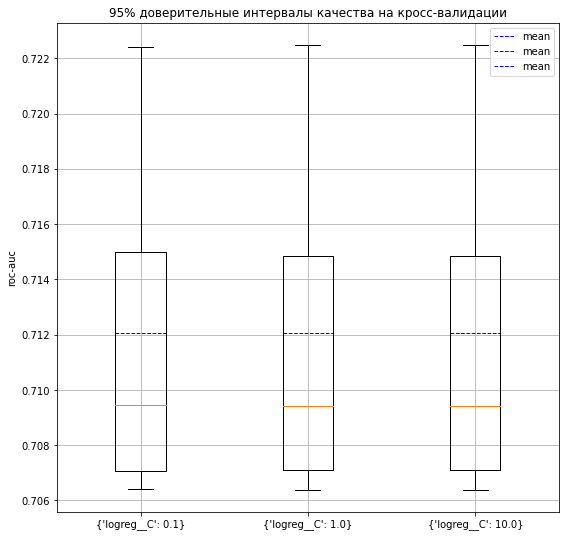

In [ ]:
print_grid_search_cv(log_reg_scaled_clf)

In [89]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(log_reg_scaled_clf))) 

Лучшие параметры: {'logreg__C': 0.1}
 cv-scores: [0.7224135425384242, 0.7094613720417308, 0.7064107356675465, 0.7070772059053984, 0.7149873689252966]
 mean: 0.7120700450156793


**C-Support Vector Classification**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC())])

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'svc__kernel': kernel}

svc_scaled_clf = GridSearchCV(pipe,
                              param_grid,
                              cv=KFold(n_splits=5, shuffle=True, random_state=753),
                              scoring='roc_auc')

svc_scaled_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinkin

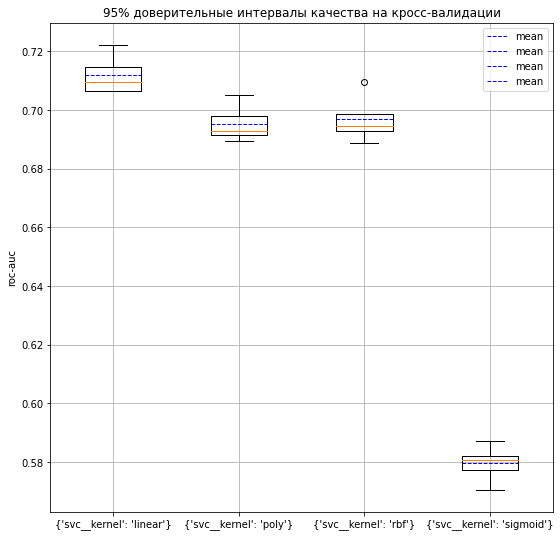

In [ ]:
print_grid_search_cv(svc_scaled_clf)

In [90]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(svc_scaled_clf))) 

Лучшие параметры: {'svc__kernel': 'linear'}
 cv-scores: [0.7222075780885898, 0.7097125928570551, 0.7065291415473159, 0.7065027732485383, 0.714574618243279]
 mean: 0.7119053407969557


**Multi-layer Perceptron Classifier**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('mlpc', MLPClassifier(random_state=753, max_iter=1000))])

hidden_layer_sizes = [(100, ), (100, 64,)]
param_grid = {'mlpc__hidden_layer_sizes': hidden_layer_sizes}

mlpc_scaled_clf = GridSearchCV(pipe,
                               param_grid,
                               cv=KFold(n_splits=5, shuffle=True, random_state=753),
                               scoring='roc_auc')
mlpc_scaled_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlpc',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                               

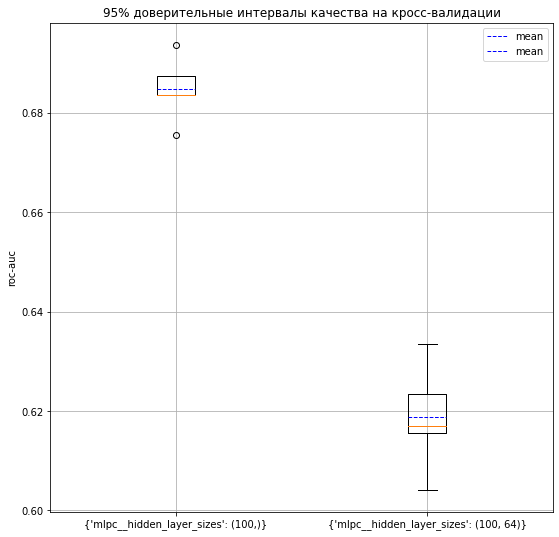

In [ ]:
print_grid_search_cv(mlpc_scaled_clf)

In [91]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(mlpc_scaled_clf))) 

Лучшие параметры: {'mlpc__hidden_layer_sizes': (100,)}
 cv-scores: [0.6936499305934883, 0.6755330231266059, 0.6834822289366373, 0.683472562002245, 0.6874211970071056]
 mean: 0.6847117883332163


**Вывод:**  
1) В данном пункте я отмасштабировала данные с помощью StandardScaler. Как и ожидалось, в логистической регрессии и методе опорых векторов качество не сильно изменилось, но с перцептроном все наоборот: среднее качество уменьшилось (возможно, что нужно подобрать другие архитектуры).

2) Почему же на качество линейных моделей масштабирование признаков не влияет? Всё дело в весах, которые сопоставляются каждому признаку. При этом, если вес у признака маленький, а сам признак большой, нельзя сказать, что этот признак не информативен, вполне возможно, что маленький вес просто "балансирует" данный признак в модели. Чтобы узнать информативность признаков, лучше обучить модель на отмасштабированных данных и посмотреть его вес (интересно услышать комментарий проверяющего). Однако масштабирование (по моим ощущениям) уменьшило время обучения, потому что ускорился градиентный спуск (вспоминается рисунок окружностей и эллипсов для градиентного спуска; для окружностей градиентный спуск идет прямо в центр, а для эллипсов он колеблется).

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

**Logistic Regression Classifier**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logreg', LogisticRegression(solver='saga', max_iter=1e4))])

reg_coef = [0.1, 1., 10.]
penalty = ['l1', 'l2']
param_grid = {'logreg__C': reg_coef, 'logreg__penalty': penalty}

log_reg_scaled_clf2 = GridSearchCV(pipe,
                                   param_grid,
                                   cv=KFold(n_splits=5, shuffle=True, random_state=753),
                                   scoring='roc_auc')
log_reg_scaled_clf2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000.0,
                        

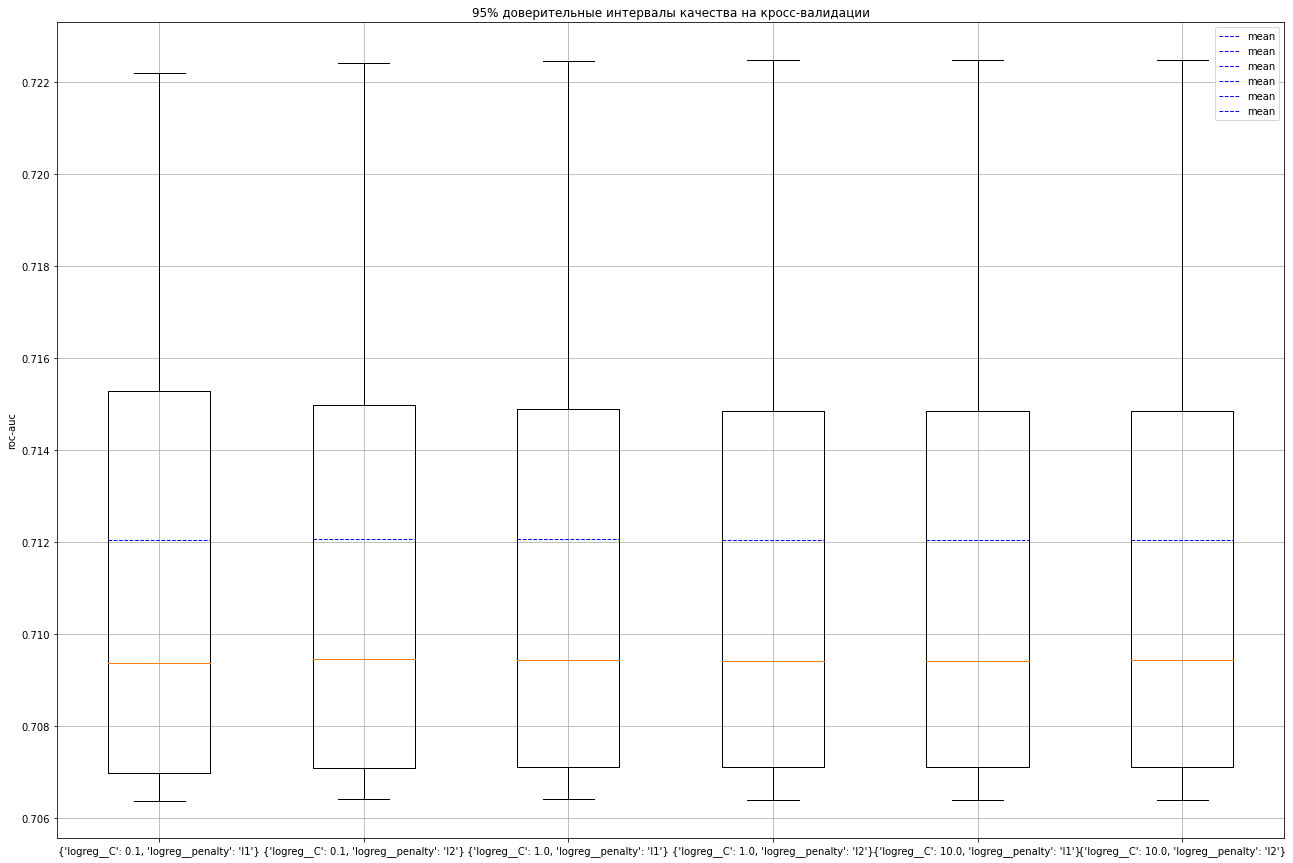

In [ ]:
print_grid_search_cv(log_reg_scaled_clf2, (22, 15))

In [92]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(log_reg_scaled_clf2))) 

Лучшие параметры: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
 cv-scores: [0.7224117885832553, 0.7094613720417308, 0.7064114898451246, 0.7070769551709344, 0.714986113600838]
 mean: 0.7120695438483766


**Вывод:** К сожалению, логистической регрессии и данный пункт не помог :( Среднее качество и доверительный интервал у всех обученных моделей почти одинаковые. На небольшие сотые (или даже тысячные) выигрывает логистическая регрессия с коэффициентом регуляризации 0.1 и l2-регуляризацией.

**C-Support Vector Classification**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC())])

reg_coef = [0.1, 1., 10.]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = {'svc__kernel': kernel, 'svc__C': reg_coef}

svc_scaled_clf2 = GridSearchCV(pipe,
                               param_grid,
                               cv=KFold(n_splits=5, shuffle=True, random_state=753),
                               scoring='roc_auc')

svc_scaled_clf2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinkin

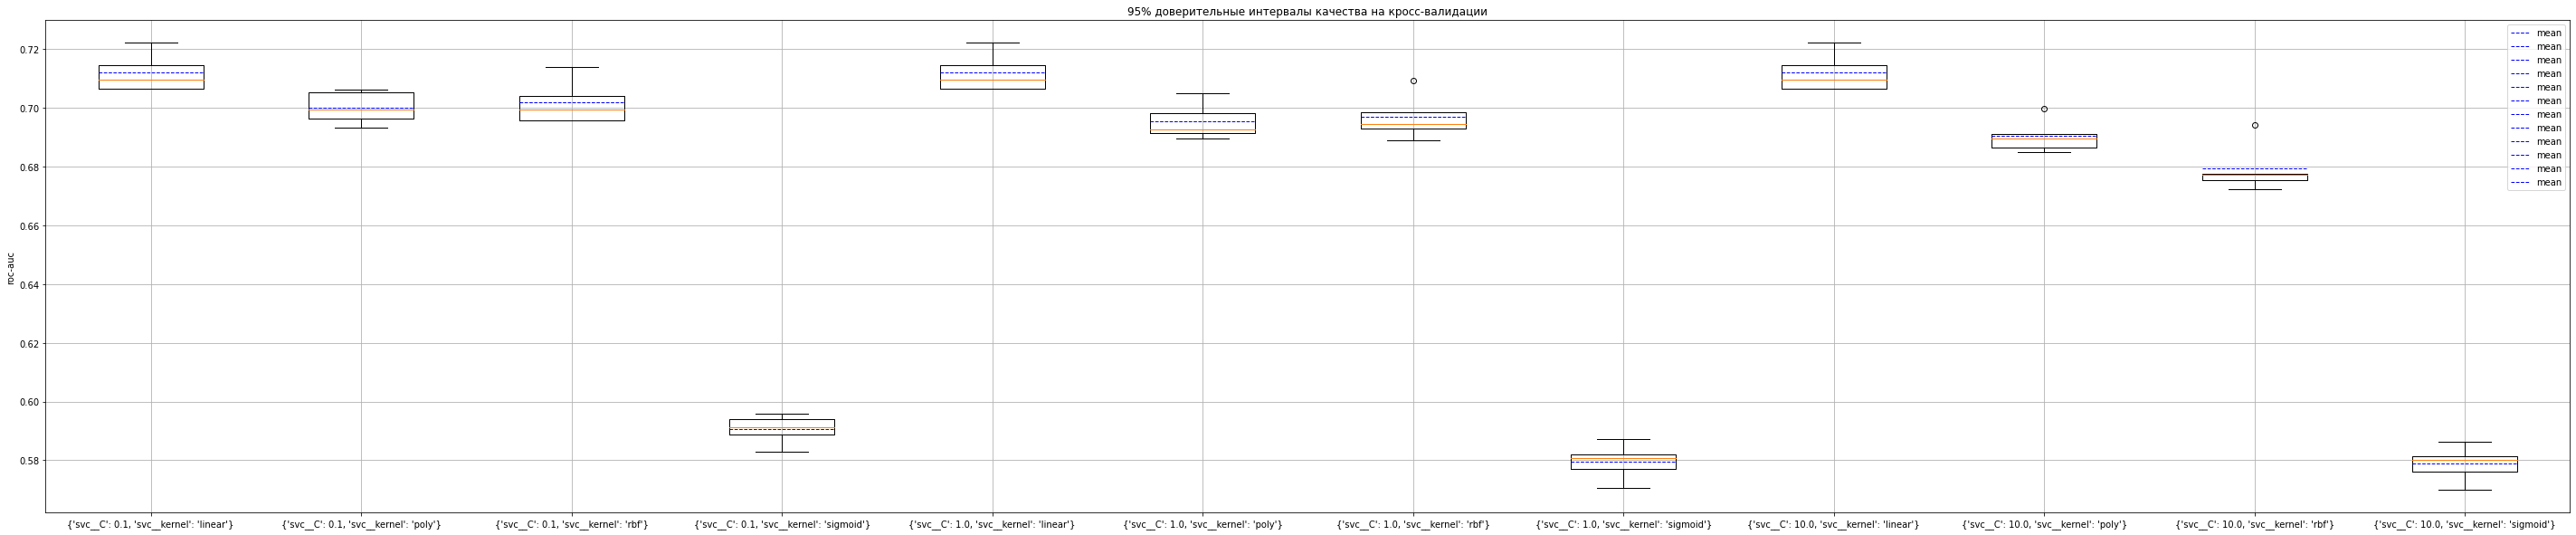

In [ ]:
print_grid_search_cv(svc_scaled_clf2, (50, 10))

In [93]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(svc_scaled_clf2))) 

Лучшие параметры: {'svc__C': 1.0, 'svc__kernel': 'linear'}
 cv-scores: [0.7222075780885898, 0.7097125928570551, 0.7065291415473159, 0.7065027732485383, 0.714574618243279]
 mean: 0.7119053407969557


**Вывод:** В данном пункте для метода опорных векторов я пробовала подобрать параметр регуляризации и ядро. Лучшей комбинацией стало: {C: 1.0, kernel: linear}. На графике видно, что исследуемые параметры влияют на среднее качество и "размер" доверительного интервала. Однако улучшить качество вновь не получилось :(

**Multi-layer Perceptron Classifier**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('mlpc', MLPClassifier(random_state=753, max_iter=1000))])

hidden_layer_sizes = [(100, ), (100, 64,)]
activation = [ 'tanh', 'sigmoid']
param_grid = {'mlpc__hidden_layer_sizes': hidden_layer_sizes,
              'mlpc__activation': activation}

mlpc_scaled_clf2 = GridSearchCV(pipe,
                                param_grid,
                                cv=KFold(n_splits=5, shuffle=True, random_state=753),
                                scoring='roc_auc')

mlpc_scaled_clf2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlpc',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                               

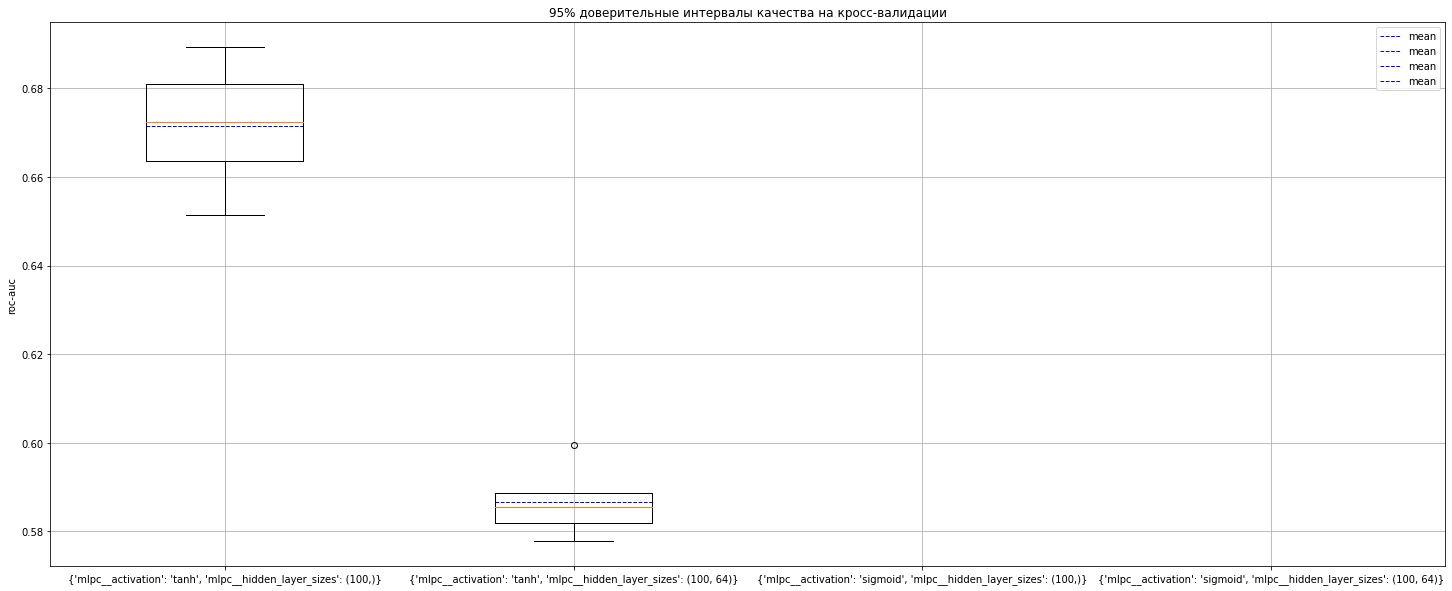

In [94]:
print_grid_search_cv(mlpc_scaled_clf2, (25, 10))

In [95]:
print("Лучшие параметры: {}\n cv-scores: {}\n mean: {}".format(*get_best_results(mlpc_scaled_clf2))) 

Лучшие параметры: {'mlpc__activation': 'tanh', 'mlpc__hidden_layer_sizes': (100,)}
 cv-scores: [0.6809485389553442, 0.6636802645992013, 0.651448536304726, 0.6893262087971189, 0.6724055079620208]
 mean: 0.6715618113236823


**Вывод:** К сожалению, при подборе параметров для многослойного перцептрона было не достаточно число итерация для сходимости в случае некоторых моделей. Всего удалось удачно завершить обучение для моделей с функцией активации tanh. Скорее всего возникла проблема затухающего градиента (для сигмоиды это не проблема). Качество уменьшилось.

### Добавление категориальных признаков в модели

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [113]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_count, title) -> None:
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator,
                                                            X=X_train,
                                                            y=y_train,
                                                            train_sizes=np.linspace(0.1, 1.0, train_count),
                                                            cv=KFold(n_splits=cv, shuffle=True, random_state=753))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label='train scores')
    plt.plot(train_sizes, test_scores_mean, label='test scores')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('cv-score')
    plt.legend()
    plt.grid()
    plt.show()

**Logistic Regression Classifier**

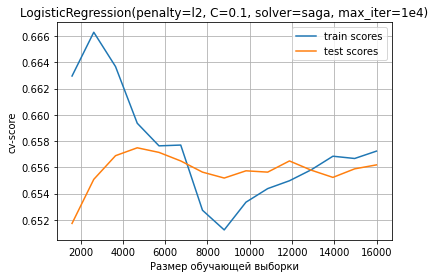

In [114]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logreg', LogisticRegression(penalty='l2', C=0.1, solver='saga', max_iter=1e4))])

plot_learning_curve(pipe, X_train, y_train, 5, 15, 'LogisticRegression(penalty=l2, C=0.1, solver=saga, max_iter=1e4)')

**C-Support Vector Classification**

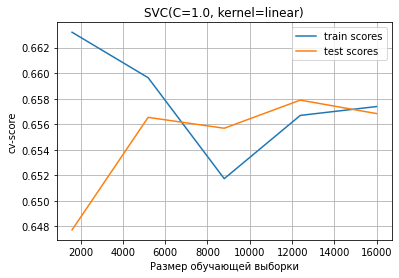

In [118]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC(C=1.0, kernel='linear'))])

plot_learning_curve(pipe, X_train, y_train, 5, 5, 'SVC(C=1.0, kernel=linear)')

**Multi-layer Perceptron Classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

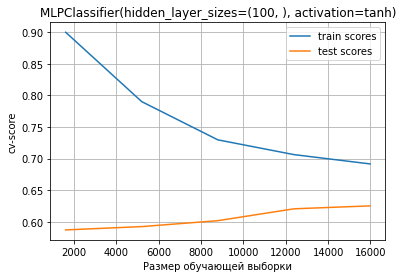

In [119]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('mlpc', MLPClassifier(hidden_layer_sizes=(100, ), activation='tanh', random_state=753, max_iter=1000))])

plot_learning_curve(pipe, X_train, y_train, 5, 5, 'MLPClassifier(hidden_layer_sizes=(100, ), activation=tanh)')

**Вывод:**  
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?  
  Вообще при добавлении объектов качество на тестовой выборке не должно уменьшаться, потому что добавление большого количества примеров добавляет разнообразия. Это уменьшает ошибку обобщения, потому что модель становится более общей благодаря обучению на большем количестве примеров. Однако добавление объектов повышает риск переобучения, поскольку большее количество объектов может быть либо неуместным, либо избыточным, и появляется больше возможностей усложнить модель, чтобы соответствовать имеющимся примерам.
* Для каких целей можно использовать знание качества на обучающей части выборки?  
  Качество на обучающей части выборки можно использовать для подбора гиперпараметров модели (например, коэффициент регуляризации, регуляризатор, ядро для метода опорных векторов и так далее). 
* Какой из алгоритмов лучше обучается на меньшем числе объектов?  
  При сравнении качества на тесте и трейне можно сказать, что логистическая регрессия и метод опорных векторов неплохо обучается при меньшем (около 6000) количестве объектов. 
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?  
  По ощущениям для любого алгоритма добавление данных может привести повышению качества (особенно у многослойного перцептрона).


После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [120]:
heroes_csv = pd.read_csv('./drive//MyDrive/lab-1/heroes.csv')
heroes_csv.head(5)

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,3,80,43,101,71,94,69,70,98,24,39
4,4,25,15,75,29,95,3,32,55,64,86


In [121]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
encoding = ohe.fit_transform(heroes_csv.iloc[:, 1:].values)

In [122]:
heroes_df = pd.DataFrame(encoding)
heroes_df['mid'] = heroes_csv['mid']
heroes_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,mid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

In [140]:
X = pd.DataFrame()
X['mid'] = train_df_on_600_sec['mid']
X['radiant_gold_max'] = train_df_on_600_sec[radiant_gold].max(axis=1)
X['radiant_gold_min'] = train_df_on_600_sec[radiant_gold].min(axis=1)
X['radiant_gold_sum'] = train_df_on_600_sec[radiant_gold].sum(axis=1)

X['dire_gold_max'] = train_df_on_600_sec[dire_gold].max(axis=1)
X['dire_gold_min'] = train_df_on_600_sec[dire_gold].min(axis=1)
X['dire_gold_sum'] = train_df_on_600_sec[dire_gold].sum(axis=1)

X['radiant_lh_max'] = train_df_on_600_sec[radiant_lh].max(axis=1)
X['radiant_lh_min'] = train_df_on_600_sec[radiant_lh].min(axis=1)
X['radiant_lh_sum'] = train_df_on_600_sec[radiant_lh].sum(axis=1)

X['dire_lh_max'] = train_df_on_600_sec[dire_lh].max(axis=1)
X['dire_lh_min'] = train_df_on_600_sec[dire_lh].min(axis=1)
X['dire_lh_sum'] = train_df_on_600_sec[dire_lh].sum(axis=1)

X = X.set_index('mid').join(heroes_df.set_index('mid'))
X.head()

,radiant_gold_max,radiant_gold_min,radiant_gold_sum,dire_gold_max,dire_gold_min,dire_gold_sum,radiant_lh_max,radiant_lh_min,radiant_lh_sum,dire_lh_max,dire_lh_min,dire_lh_sum,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
mid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5755,2613,21454,6384,1725,22095,57,3,148,75,2,192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5760,2477,22165,7659,2748,24536,63,5,157,49,3,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8581,1948,21392,5130,2301,15548,69,6,174,56,6,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5154,2076,18038,4458,2220,17484,45,4,143,37,6,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4264,2412,16017,5389,2992,22041,42,3,96,53,12,145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [176]:
y = train_df_on_600_sec.radiant_won

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=753, shuffle=True)

In [178]:
from sklearn.compose import ColumnTransformer

numeric_features = X_train.columns[:12]
categorical_features = X_train.columns[12:]

numeric_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

**Logistic Regression Classifier**

In [179]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('clf', LogisticRegression(solver='saga', max_iter=1e4))])

reg_coef = [0.1, 1., 10.]
penalty = ['l1', 'l2']
param_grid = {'clf__C': reg_coef, 'clf__penalty': penalty}

cat_log_reg = GridSearchCV(pipe,
                           param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=753),
                           scoring='roc_auc')
cat_log_reg.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                    

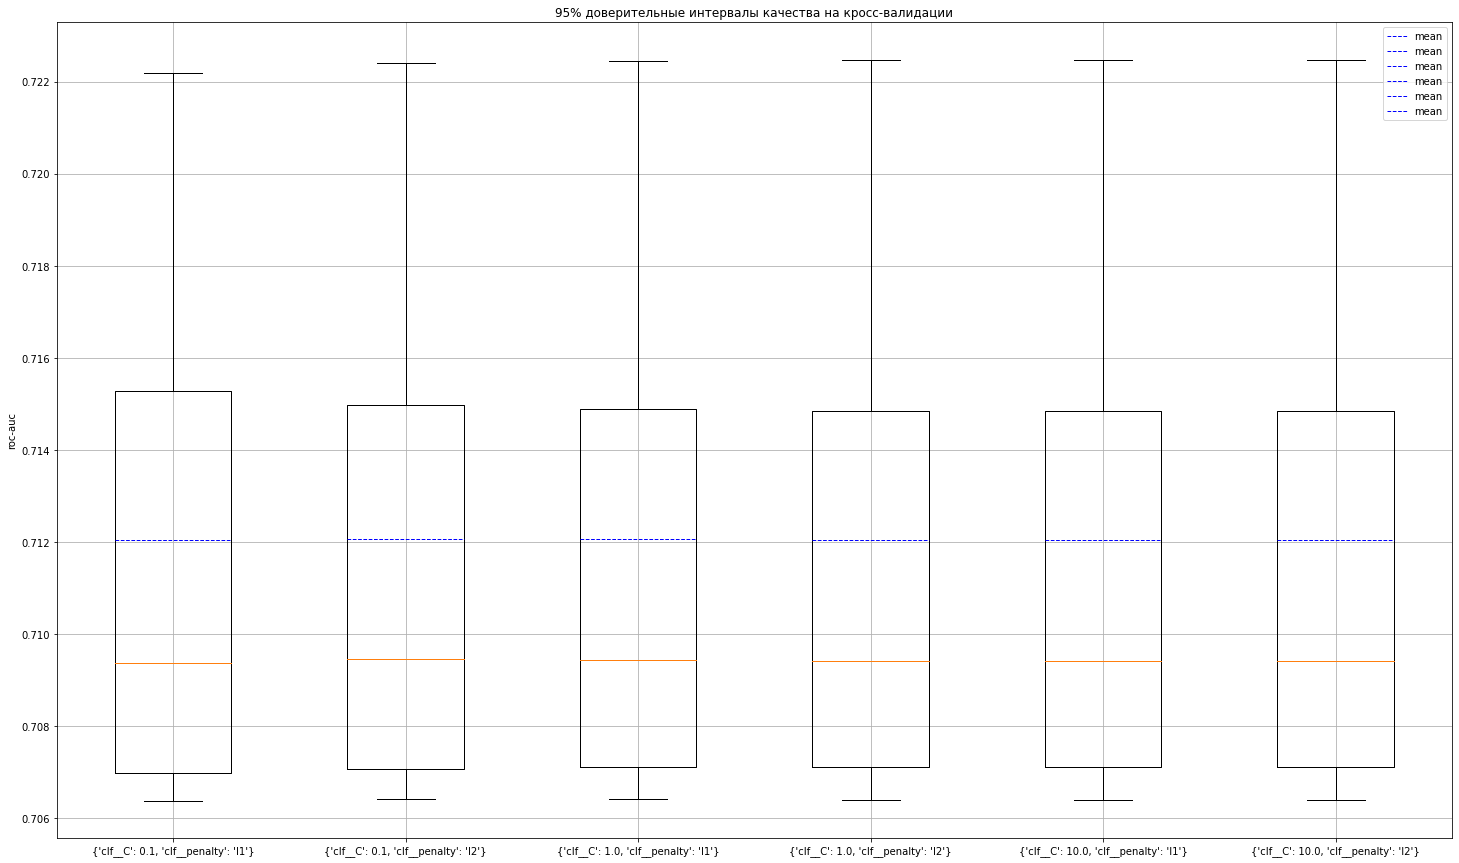

In [180]:
print_grid_search_cv(cat_log_reg, (25, 15))

In [181]:
get_best_results(cat_log_reg)

({'clf__C': 0.1, 'clf__penalty': 'l2'},
 [0.7224155470586172,
  0.7094601184448479,
  0.706408724527338,
  0.7070767044364705,
  0.7149873689252967],
 0.712069692678514)

**C-Support Vector Classification**

In [184]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('clf', SVC())])

reg_coef = [0.1, 1., 10.]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = {'clf__kernel': kernel, 'clf__C': reg_coef}

cat_svc_clf = GridSearchCV(pipe,
                           param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=753),
                           scoring='roc_auc')

cat_svc_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                    

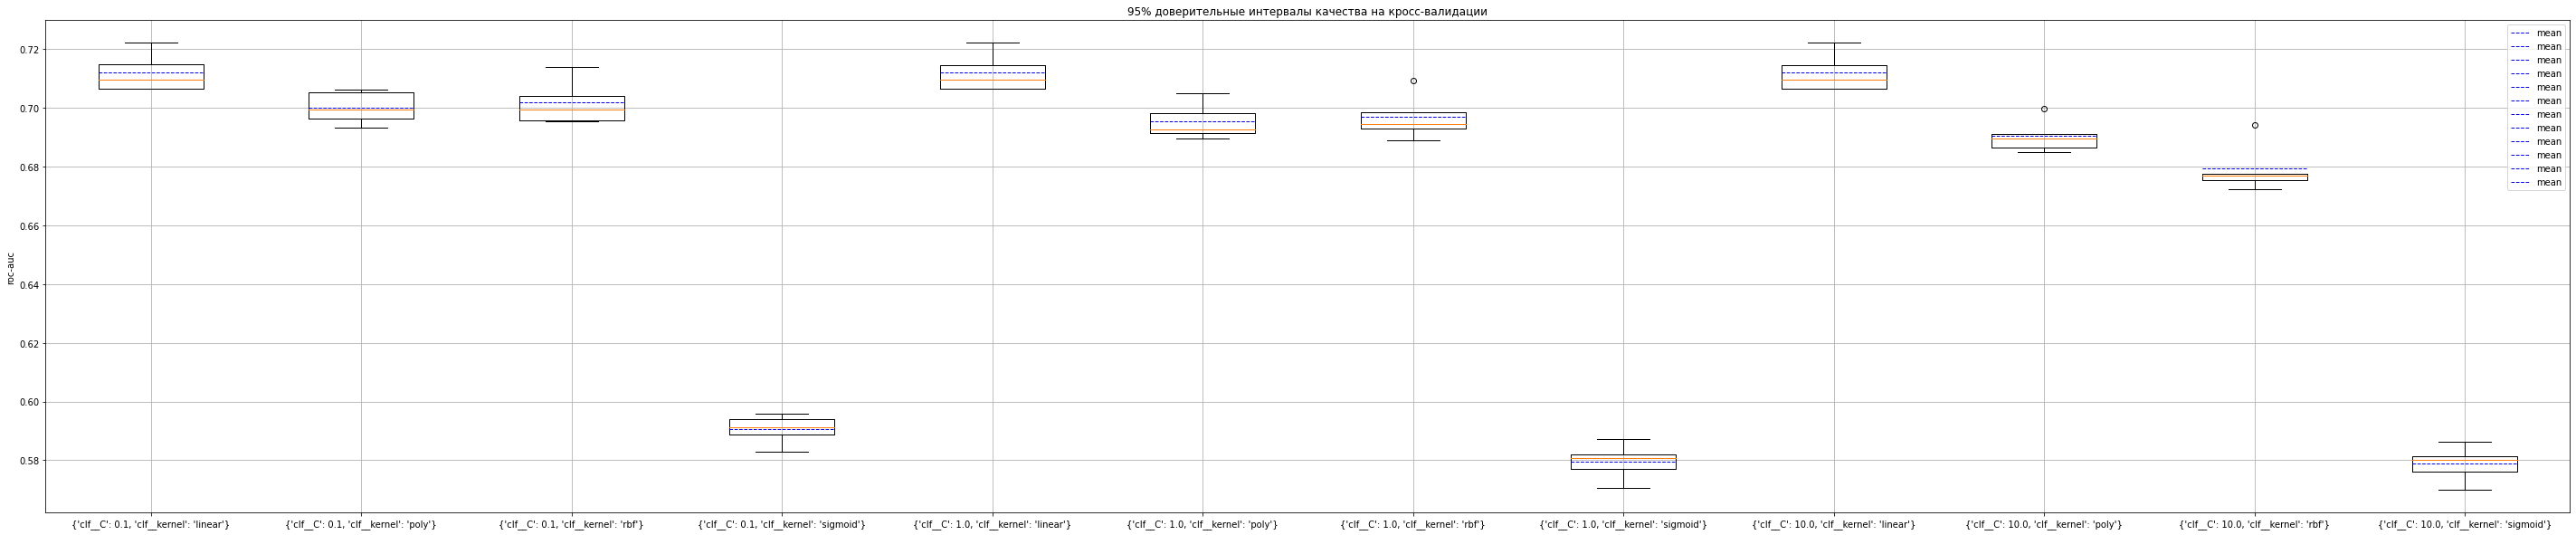

In [185]:
print_grid_search_cv(cat_svc_clf, (50, 10))

In [186]:
get_best_results(cat_svc_clf)

({'clf__C': 1.0, 'clf__kernel': 'linear'},
 [0.7222075780885898,
  0.7097108378214191,
  0.7065356777529934,
  0.7064957526835483,
  0.7145811459304641],
 0.7119061984554029)

**Multi-layer Perceptron Classifier**

In [187]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('clf', MLPClassifier(random_state=753, max_iter=1000))])

hidden_layer_sizes = [(100, ), (100, 64,)]
activation = [ 'tanh', 'sigmoid']
param_grid = {'clf__hidden_layer_sizes': hidden_layer_sizes,
              'clf__activation': activation}

cat_mlpc_clf = GridSearchCV(pipe,
                                param_grid,
                                cv=KFold(n_splits=5, shuffle=True, random_state=753),
                                scoring='roc_auc')

cat_mlpc_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                    

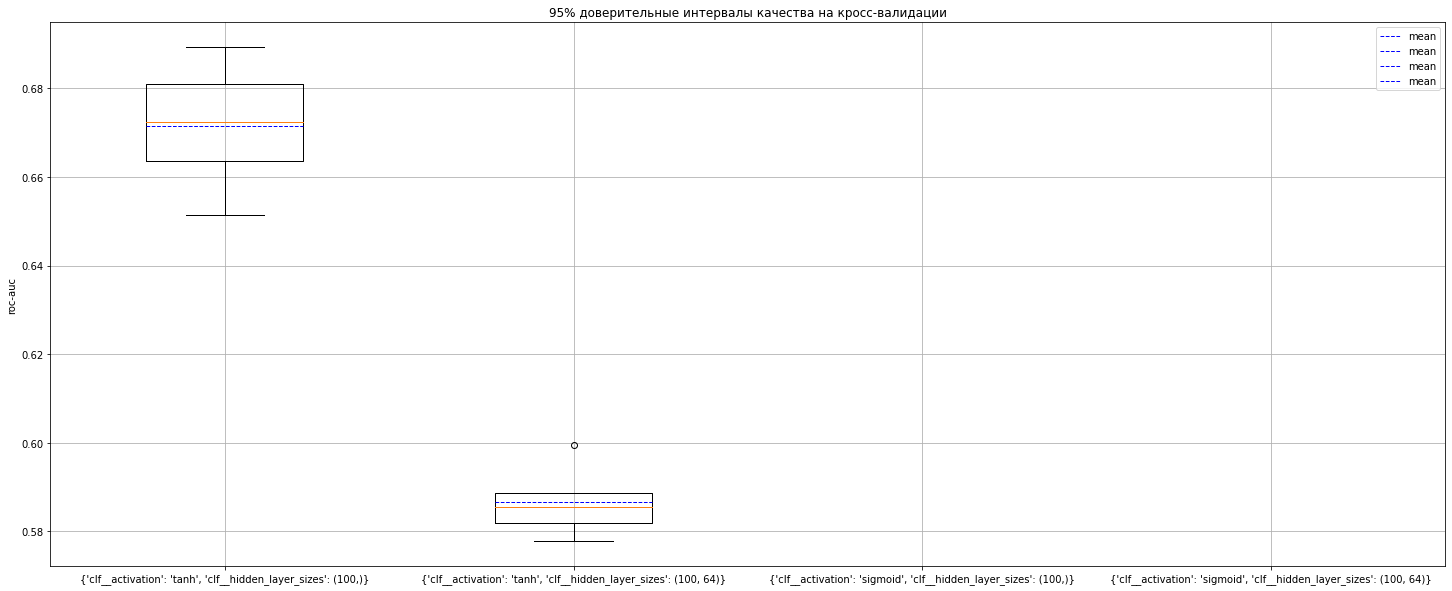

In [188]:
print_grid_search_cv(cat_mlpc_clf, (25, 10))

In [189]:
get_best_results(cat_mlpc_clf)

({'clf__activation': 'tanh', 'clf__hidden_layer_sizes': (100,)},
 [0.6809485389553442,
  0.6636802645992013,
  0.651448536304726,
  0.6893262087971189,
  0.6724055079620208],
 0.6715618113236823)

**Вывод:** К сожалению, качество не сильно увеличилось при добавлении новых признаков. Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте? Наилучшим классификатором по прежнему является логисическая регрессия (как и за всё время исследования), но его качество почти не увеличилось :(



### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [200]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
from sklearn.utils import check_X_y
from sklearn.utils.multiclass import unique_labels


class MyClf(BaseEstimator):
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        
        self.X_ = X
        self.y_ = y

        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        return self
    
    def predict_proba(self, X, cheсk=False):
        proba1 = self.clf1.predict_proba(X)
        proba2 = self.clf2.predict_proba(X)
        return np.array(proba1) * self.alpha + np.array(proba2) * (1 - self.alpha)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return [int (x > 0.5) for x in proba]
    
    def get_params(self, deep=True):
        return {'clf1': self.clf1, 'clf2': self.clf2, 'alpha': self.alpha}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def score(self, X, y):
        return roc_auc_score(y, self.predict_proba(X)[:,1])

**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [214]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('clf', MyClf(LogisticRegression(C=0.1,
                                                  solver='saga',
                                                  max_iter=1e4),
                                SVC(kernel='linear', probability=True)))])

alpha = list(np.linspace(0, 1, 9))
param_grid = {'clf__alpha': alpha}

my_clf_ = GridSearchCV(pipe,
                       param_grid,
                       cv=KFold(n_splits=5, shuffle=True, random_state=753),
                       scoring='roc_auc')
my_clf_.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=753, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                    

In [213]:
list(np.linspace(0, 1, 9))

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]

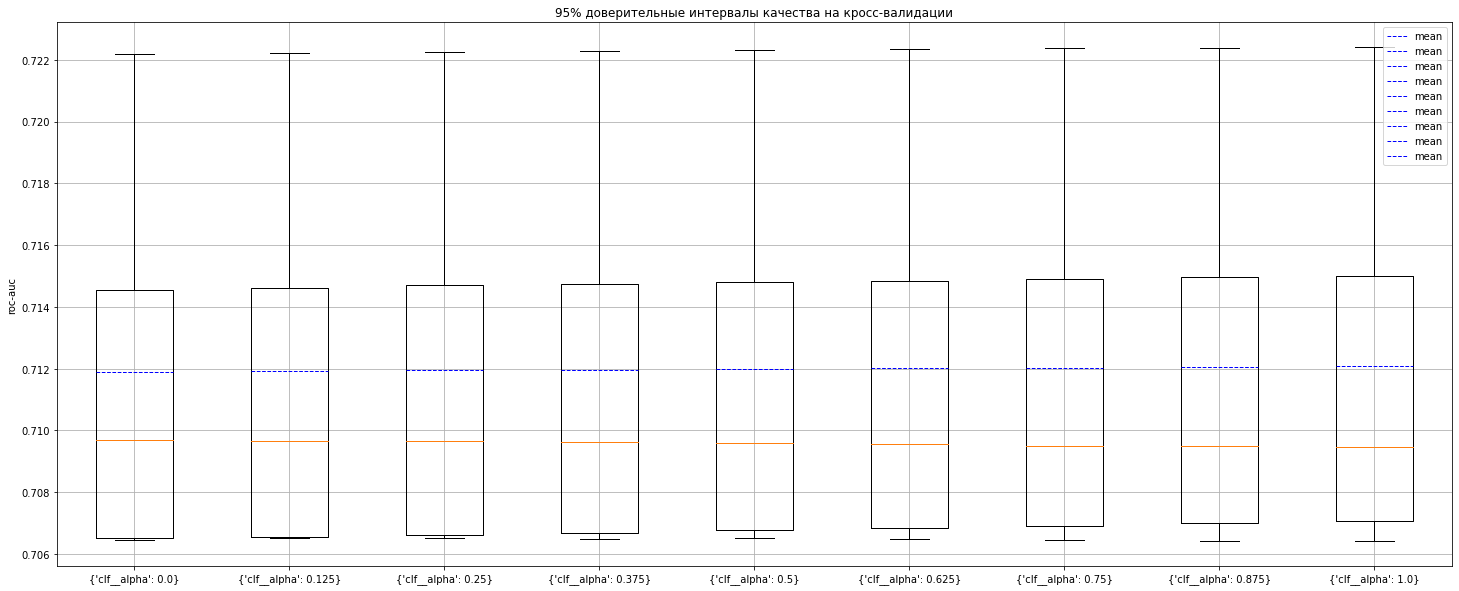

In [215]:
print_grid_search_cv(my_clf_, (25, 10))

In [216]:
get_best_results(my_clf_)

({'clf__alpha': 1.0},
 [0.7224130414083759,
  0.7094583634092119,
  0.7064117412376506,
  0.7070741970918313,
  0.7149863646657296],
 0.71206874156256)

**Вывод:** Этот подход не дал увеличения качества на данной задаче. Однако блендинг может увеличивать качество предсказаний, потому что используется несколько обучающих алгоритмов с целью получения лучшего прогнозирования, чем могли бы получить от каждого обучающего алгоритма по отдельности. Интуитивно несколько алгоритмов вместе уже сильнее одного.

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [234]:
cv_mlpc = get_best_results(mlpc_clf)[1]

In [239]:
cv_log_reg = get_best_results(log_reg_scaled_clf)[1]

In [238]:
cv_svc = get_best_results(cat_svc_clf)[1]

In [241]:
cv_blending = get_best_results(my_clf_)[1]

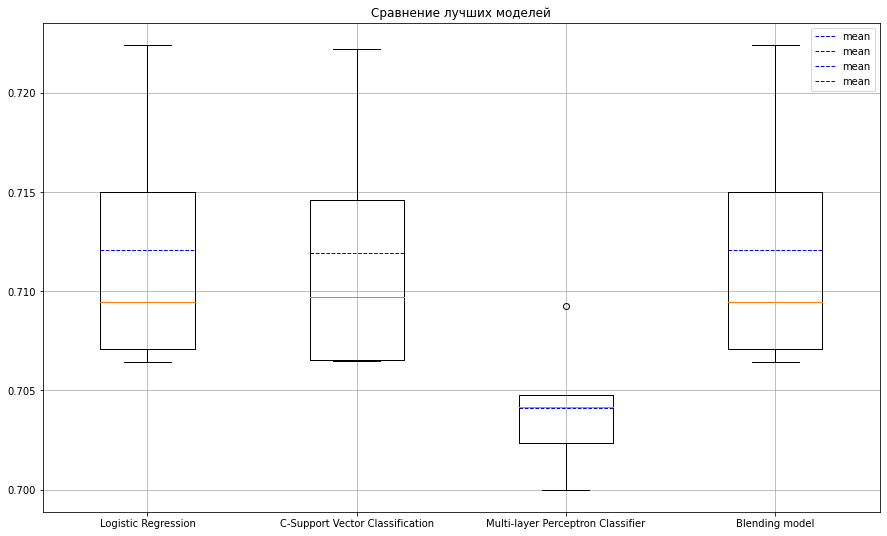

In [257]:
plt.figure(figsize=(15, 9))

plt.title('Сравнение лучших моделей')
plt.boxplot(x=[cv_log_reg, cv_svc, cv_mlpc, cv_blending],
            labels=['Logistic Regression', 'C-Support Vector Classification', 'Multi-layer Perceptron Classifier', 'Blending model'],
            meanline=True,
            showmeans=True,
            meanprops={'c': 'b', 'label': 'mean'})

plt.grid()
plt.legend()
plt.show()

1) Наилучшее качество было получено с помощью логистической регресии, однако почти такое же качество дает метод опорных векторов. Хуже всего (по среднему качеству) себя показал перцептрон, но он обладает наименьшим доверительным интервалом (как было сказано выше, это хорошо, так как он дает большую уверенность по отношению к полученному результату).  

2) В лабораторной работе, к сожалению, получилось так, что качество для логистической регрессии почти не изменялось при добавлении новых признаков и изменении гиперпараметров (параметр регуляризации, тип регуляризатора). Лучше всего получилось исследование для метода опорных векторов. Были построены различные доверительные интервалы и средние значения в зависимости от коэффициента регуляризации и ядра (лучшее качество получено при коэффициенте регуляризации 1.0 и с использованием линейного ядра). Для многослойного перцептрона лучше всего подошла функция активации tanh, при этом можно с чистой совестью попробовать добавить данных, чтобы увеличить качество классификации.

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.